In [7]:
m = 0
b = 0
alpha = 0.01  # learning rate
iterations = 1000


In [8]:
def compute_cost(x, y, m, b):
    n = len(y)
    total_cost = 0
    for i in range(n):
        prediction = m * x[i] + b
        total_cost += (y[i] - prediction) ** 2
    return total_cost / (2 * n)

In [3]:
def gradient_descent(x, y, m, b, alpha, iterations):
    n = len(x)
    for _ in range(iterations):
        # Calculate gradients
        gradient_m = -1 / n * sum(x[i] * (y[i] - (m * x[i] + b)) for i in range(n))
        gradient_b = -1 / n * sum(y[i] - (m * x[i] + b) for i in range(n))
        
        # Update parameters
        m -= alpha * gradient_m
        b -= alpha * gradient_b
        
        # Optionally, print the cost every 100 iterations to see progress
        if _ % 100 == 0:
            cost = compute_cost(x, y, m, b)
            print(f"Iteration {_}: Cost {cost}, m {m}, b {b}")
            
    return m, b


In [12]:

x = [34.12, 35.72, 34.72, 34.05, 34.13, 35.73, 36.17, 35.57, 35.37, 35.57]
y = [144, 152, 124, 140, 152, 145, 128, 136, 144, 148]

m, b = gradient_descent(x, y, m, b, alpha, iterations)


Iteration 0: Cost 1284161.0320568208, m 49.60853, b 1.413
Iteration 100: Cost 1.1989513954411295e+217, m 1.3930702027909707e+107, b 3.965370403879219e+105


OverflowError: (34, 'Numerical result out of range')

Coefficients: m = -1.6046609448973927, b = 197.64766908007198


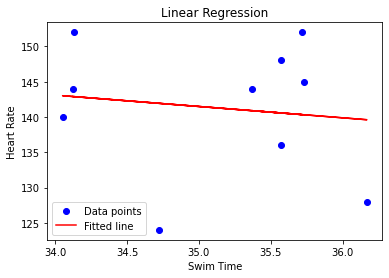

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data
swim_time = np.array([34.12, 35.72, 34.72, 34.05, 34.13, 35.73, 36.17, 35.57, 35.37, 35.57])
heart_rate = np.array([144, 152, 124, 140, 152, 145, 128, 136, 144, 148])

# Reshape data for sklearn
X = swim_time.reshape(-1, 1)  # sklearn expects 2D array for features
y = heart_rate

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Retrieve the parameters
m = model.coef_[0]  # Slope
b = model.intercept_  # Intercept

print(f"Coefficients: m = {m}, b = {b}")

# Make predictions
predictions = model.predict(X)

# Plotting
plt.scatter(swim_time, heart_rate, color='blue', label='Data points')
plt.plot(swim_time, predictions, color='red', label='Fitted line')
plt.xlabel('Swim Time')
plt.ylabel('Heart Rate')
plt.title('Linear Regression')
plt.legend()
plt.show()


Coefficients: m = -1.6046609448973927, b = 197.64766908007198
Largest Residual: -17.933841073234504 at index 2
Data Point with Largest Residual: Swim Time = 34.72, Heart Rate = 124
Mean Squared Error: 79.37142146289948
R-squared: 0.017801986599437325


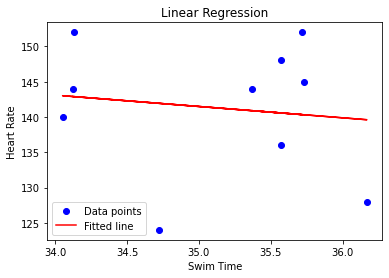

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data
swim_time = np.array([34.12, 35.72, 34.72, 34.05, 34.13, 35.73, 36.17, 35.57, 35.37, 35.57])
heart_rate = np.array([144, 152, 124, 140, 152, 145, 128, 136, 144, 148])

# Reshape data for sklearn
X = swim_time.reshape(-1, 1)  # sklearn expects 2D array for features
y = heart_rate

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Retrieve the parameters
m = model.coef_[0]  # Slope
b = model.intercept_  # Intercept

print(f"Coefficients: m = {m}, b = {b}")

# Make predictions
predictions = model.predict(X)

# Calculate residuals
residuals = y - predictions

# Find the index of the largest residual
largest_residual_index = np.argmax(np.abs(residuals))
largest_residual = residuals[largest_residual_index]

print(f"Largest Residual: {largest_residual} at index {largest_residual_index}")
print(f"Data Point with Largest Residual: Swim Time = {swim_time[largest_residual_index]}, Heart Rate = {heart_rate[largest_residual_index]}")

# Assess the fit of the model
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")

# R-squared
r2 = r2_score(y, predictions)
print(f"R-squared: {r2}")

# Plotting
plt.scatter(swim_time, heart_rate, color='blue', label='Data points')
plt.plot(swim_time, predictions, color='red', label='Fitted line')
plt.xlabel('Swim Time')
plt.ylabel('Heart Rate')
plt.title('Linear Regression')
plt.legend()
plt.show()


Coefficients: m = 0.6477495585375184, b = 0.6263091295254988


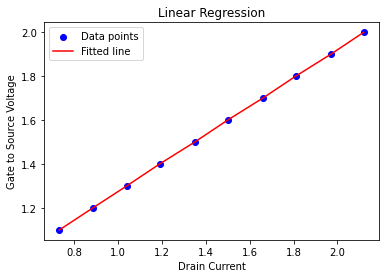

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data
drain_current = np.array([0.734, 0.886, 1.04, 1.19, 1.35, 1.50, 1.66, 1.81, 1.97, 2.12])
gate_to_source_voltage = np.array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])

# Reshape data for sklearn
X = drain_current.reshape(-1, 1)  # sklearn expects 2D array for features
y = gate_to_source_voltage

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Retrieve the parameters
m = model.coef_[0]  # Slope
b = model.intercept_  # Intercept

print(f"Coefficients: m = {m}, b = {b}")

# Make predictions
predictions = model.predict(X)

# Plotting
plt.scatter(drain_current,gate_to_source_voltage, color='blue', label='Data points')
plt.plot(drain_current,gate_to_source_voltage, color='red', label='Fitted line')
plt.xlabel('Drain Current')
plt.ylabel('Gate to Source Voltage')
plt.title('Linear Regression')
plt.legend()
plt.show()


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Student.csv'
data = pd.read_csv(file_path)

# Convert categorical variable to numerical
from sklearn.preprocessing import LabelEncoder
data['Extracurricular Activities'] = LabelEncoder().fit_transform(data['Extracurricular Activities'])

# Plotting the covariance matrix
plt.figure(figsize=(10, 8))
cov_matrix = data.cov()
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix')
plt.show()

# Plotting linear regression models for the attributes related to Performance Index
# Based on the previous analysis, all attributes are related to the Performance Index.

# Function to plot linear regression
def plot_regression(x, y, xlabel):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x, y=y, data=data, line_kws={"color":"red"})
    plt.xlabel(xlabel)
    plt.ylabel('Performance Index')
    plt.title(f'Linear Regression: {xlabel} vs Performance Index')
    plt.show()

# Dependent variable
y = data['Performance Index']

# Plot regression for each attribute
plot_regression(data['Hours Studied'], y, 'Hours Studied')
plot_regression(data['Previous Scores'], y, 'Previous Scores')
plot_regression(data['Extracurricular Activities'], y, 'Extracurricular Activities')
plot_regression(data['Sleep Hours'], y, 'Sleep Hours')
plot_regression(data['Sample Question Papers Practiced'], y, 'Sample Question Papers Practiced')


FileNotFoundError: [Errno 2] No such file or directory: 'Student.csv'